# Will they stay in our bank or choose an other one? Deep Learning Approch
## Kaggle Competition Notebook

- Aurthor: Muhammad Anas
- Gmail : anastariq0077@gmail.com
- Kaggle Id: https://www.kaggle.com/muhammadanas007
- LinkenIn Id: https://www.linkedin.com/in/muhammad-anas-b2a597236/ 

## Aim : `We will classify the cutomers who will stay and leave the bank using deep learning approch.`

## Dataset Description
The dataset for this competition (both train and test) was generated from a deep learning model trained on the Bank Customer Churn Prediction dataset. Feature distributions are close to, but not exactly the same, as the original. Feel free to use the original dataset as part of this competition, both to explore differences as well as to see whether incorporating the original in training improves model performance.

### Files
- train.csv - the training dataset; Exited is the binary target
- test.csv - the test dataset; your objective is to predict the probability of Exited
- sample_submission.csv - a sample submission file in the correct format

**Importing the Libraries**

In [41]:
# Import the libraries:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
#Import the machine learning libraries from scikit-learn as sklearn:
#Preprocess data:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
#Imputer for data:
from sklearn.impute import SimpleImputer, KNNImputer
#Import iteravtive imputer:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
#Machine Learning modeling:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
#For classification task import evalution methods(mertics):
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_absolute_error, mean_squared_error, r2_score
#Create a tensorflow for binary classification:
import tensorflow as tf
#Import the sequential:
from tensorflow.keras.models import Sequential
#Ignore the warnings:
import warnings
warnings.filterwarnings('ignore')

**Load the Dataset**

In [42]:
#Load the dataset:
df_test = pd.read_csv('test.csv')
df_train = pd.read_csv('train.csv')
df_submission = pd.read_csv('sample_submission.csv')

# Explorary Data Analysis(EDA) of dataset

In [43]:
#Check the first five rows of all dataset:
df_test.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,165034,15773898,Lucchese,586,France,Female,23.0,2,0.00,2,0.0,1.0,160976.75
1,165035,15782418,Nott,683,France,Female,46.0,2,0.00,1,1.0,0.0,72549.27
2,165036,15807120,K?,656,France,Female,34.0,7,0.00,2,1.0,0.0,138882.09
3,165037,15808905,O'Donnell,681,France,Male,36.0,8,0.00,1,1.0,0.0,113931.57
4,165038,15607314,Higgins,752,Germany,Male,38.0,10,121263.62,1,1.0,0.0,139431.00


In [44]:
df_train.head().T

,0,1,2,3,4
id,0,1,2,3,4
CustomerId,15674932,15749177,15694510,15741417,15766172
Surname,Okwudilichukwu,Okwudiliolisa,Hsueh,Kao,Chiemenam
CreditScore,668,627,678,581,716
Geography,France,France,France,France,Spain
Gender,Male,Male,Male,Male,Male
Age,33.0,33.0,40.0,34.0,33.0
Tenure,3,1,10,2,5
Balance,0.0,0.0,0.0,148882.54,0.0
NumOfProducts,2,2,2,1,2


In [45]:
df_submission.head()

,id,Exited
0,165034,0.5
1,165035,0.5
2,165036,0.5
3,165037,0.5
4,165038,0.5


In [46]:
#Copy the dataset:
df = df_train.copy()

In [47]:
#Dataset info:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               165034 non-null  int64  
 1   CustomerId       165034 non-null  int64  
 2   Surname          165034 non-null  object 
 3   CreditScore      165034 non-null  int64  
 4   Geography        165034 non-null  object 
 5   Gender           165034 non-null  object 
 6   Age              165034 non-null  float64
 7   Tenure           165034 non-null  int64  
 8   Balance          165034 non-null  float64
 9   NumOfProducts    165034 non-null  int64  
 10  HasCrCard        165034 non-null  float64
 11  IsActiveMember   165034 non-null  float64
 12  EstimatedSalary  165034 non-null  float64
 13  Exited           165034 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 17.6+ MB


In [48]:
#Find and plot the null values:
df.isnull().sum().sort_values(ascending=True)

id                 0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [49]:
#Statistical value of data:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,165034.0,8.251650e+04,47641.356500,0.00,41258.25,82516.5,1.237748e+05,165033.00
CustomerId,165034.0,1.569201e+07,71397.816791,15565701.00,15633141.00,15690169.0,1.575682e+07,15815690.00
CreditScore,165034.0,6.564544e+02,80.103340,350.00,597.00,659.0,7.100000e+02,850.00
Age,165034.0,3.812589e+01,8.867205,18.00,32.00,37.0,4.200000e+01,92.00
Tenure,165034.0,5.020353e+00,2.806159,0.00,3.00,5.0,7.000000e+00,10.00
Balance,165034.0,5.547809e+04,62817.663278,0.00,0.00,0.0,1.199395e+05,250898.09
NumOfProducts,165034.0,1.554455e+00,0.547154,1.00,1.00,2.0,2.000000e+00,4.00
HasCrCard,165034.0,7.539537e-01,0.430707,0.00,1.00,1.0,1.000000e+00,1.00
IsActiveMember,165034.0,4.977702e-01,0.499997,0.00,0.00,0.0,1.000000e+00,1.00
EstimatedSalary,165034.0,1.125748e+05,50292.865585,11.58,74637.57,117948.0,1.551525e+05,199992.48


In [50]:
# Columns of dataset:
df.columns

Index(['id', 'CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender',
       'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

***Categorical Dataset***

In [51]:
#Drop the categorical columns froms the dataset:
cat_columns = ['Geography', 'Gender','Tenure', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'Exited']
#Check the data type of cat_columns:
for col in cat_columns:
    print(df[col].value_counts())
    print()

Geography
France     94215
Spain      36213
Germany    34606
Name: count, dtype: int64

Gender
Male      93150
Female    71884
Name: count, dtype: int64

Tenure
2     18045
7     17810
4     17554
8     17520
5     17268
1     16760
9     16709
3     16630
6     15822
10     5909
0      5007
Name: count, dtype: int64

NumOfProducts
2    84291
1    77374
3     2894
4      475
Name: count, dtype: int64

HasCrCard
1.0    124428
0.0     40606
Name: count, dtype: int64

IsActiveMember
0.0    82885
1.0    82149
Name: count, dtype: int64

Exited
0    130113
1     34921
Name: count, dtype: int64



***Numerical dataset***

In [52]:
#Make the numerical columns:
num_col = ['Age', 'Balance', 'EstimatedSalary', 'CreditScore']
#Check the data type of cat_columns:
for col in num_col:
    print(df[col].value_counts())
    print()

Age
37.00    9255
38.00    9246
35.00    9118
34.00    8625
36.00    8556
         ... 
84.00       4
83.00       3
85.00       3
36.44       1
32.34       1
Name: count, Length: 71, dtype: int64

Balance
0.00         89648
124577.33       88
127864.40       64
122314.50       63
129855.32       59
             ...  
125824.21        1
158741.56        1
126815.52        1
61172.57         1
110993.29        1
Name: count, Length: 30075, dtype: int64

EstimatedSalary
88890.05     178
140941.47    107
167984.72    100
90876.95      98
129964.94     98
            ... 
102747.73      1
170593.45      1
109179.48      1
60538.47       1
71173.03       1
Name: count, Length: 55298, dtype: int64

CreditScore
850    2532
678    2299
684    1718
667    1658
705    1605
       ... 
419       1
386       1
358       1
423       1
373       1
Name: count, Length: 457, dtype: int64



**Distribution plot of Numerical dataset**

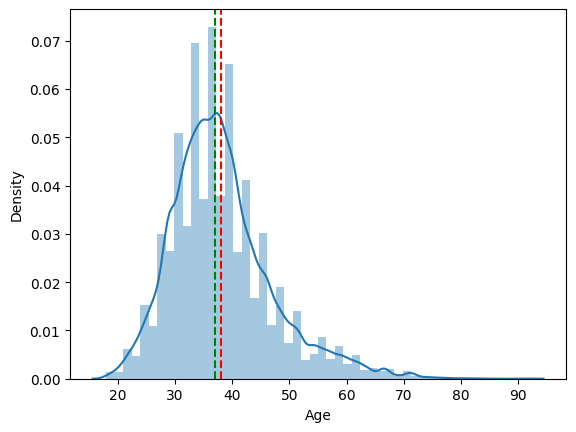

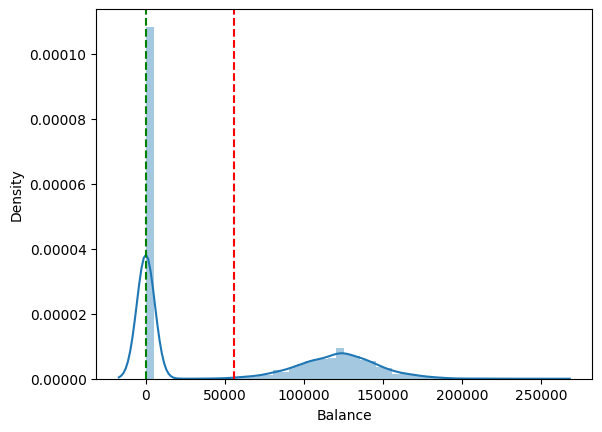

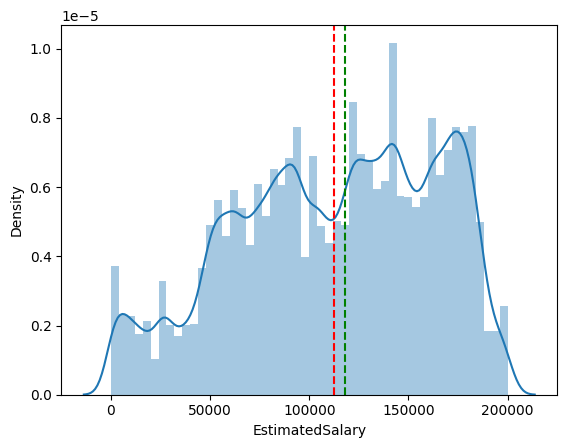

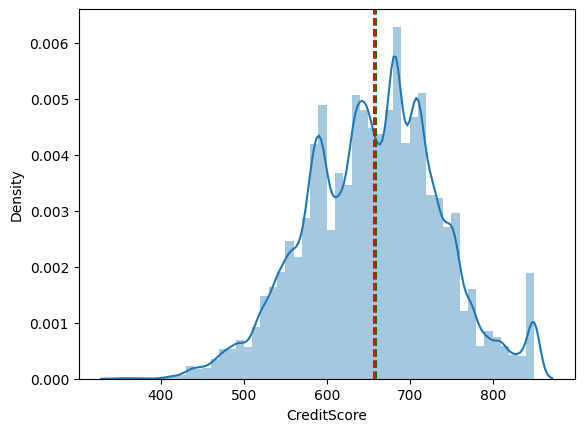

In [53]:
#Create the histogram of num_col with sns as kde is True:
for col in num_col:
    sns.distplot(df[col], kde=True)
    plt.axvline(df[col].mean(), color='r', linestyle='--', label='Mean')
    plt.axvline(df[col].median(), color='g', linestyle='--', label='Median')
    plt.show()

**Count plot of the Categorical data**

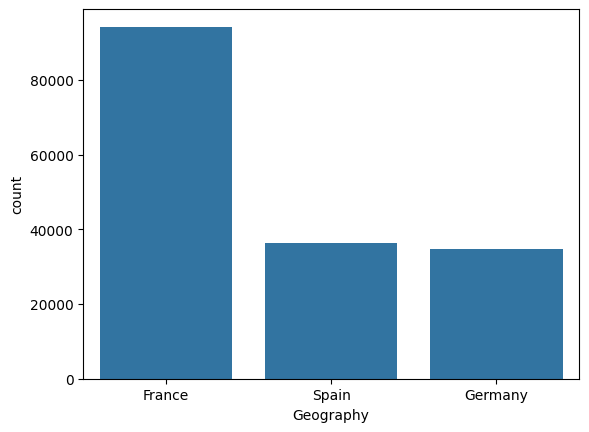

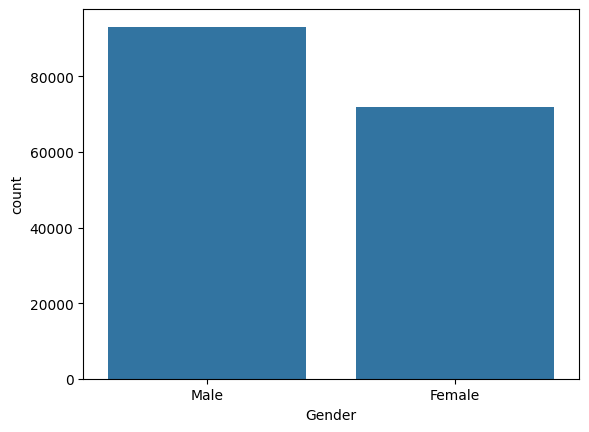

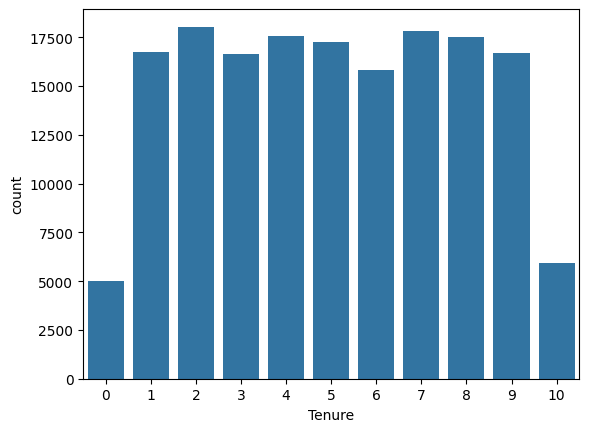

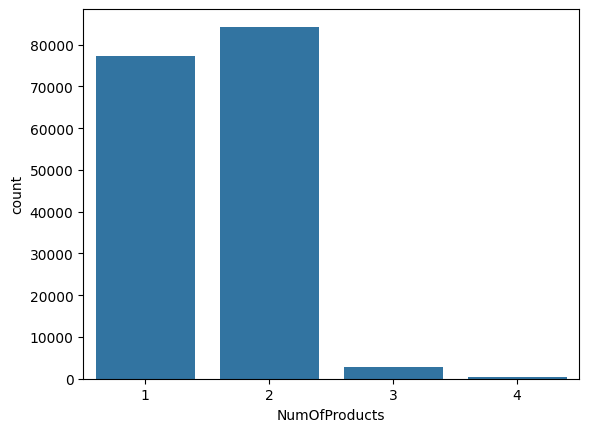

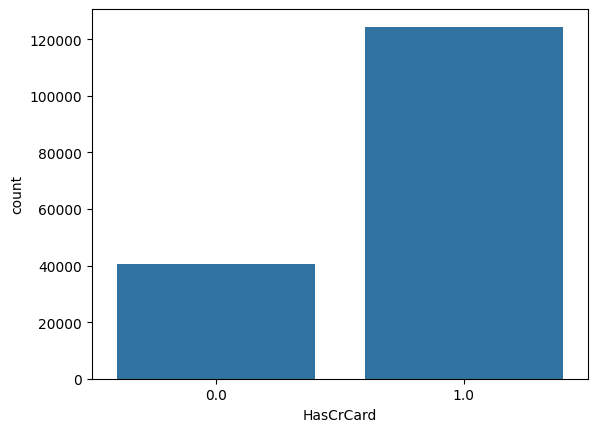

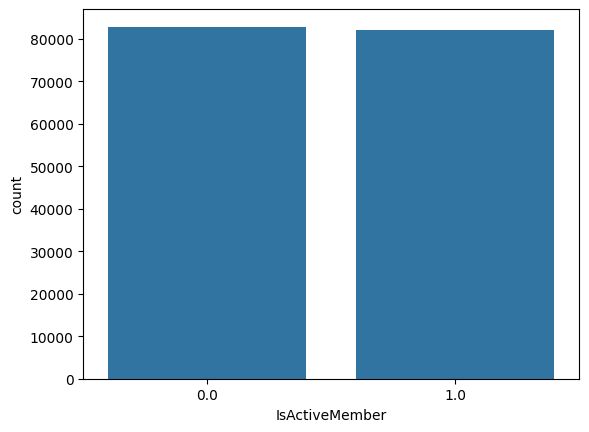

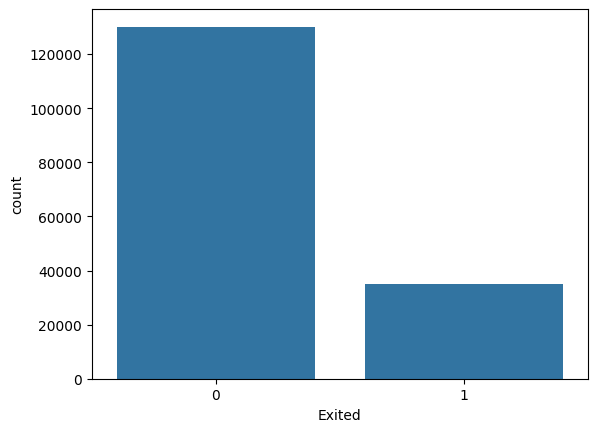

In [54]:
#Create the histogram of num_col with sns as kde is True:
for col in cat_columns:
    sns.countplot(df, x = df[col])
    plt.show()

In [55]:
# Columns of dataset:
df.columns

Index(['id', 'CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender',
       'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [56]:
# Shape of dataset with Rows and Columns:
print(f'The number of rows {df.shape[0]} and columns {df.shape[1]} in the training dataset.')

The number of rows 165034 and columns 14 in the training dataset.


# Applying the Machine Learning Model

**Label Encoding of Training dataset**

In [57]:
#Apply the Label encoder on the 
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
df['Geography'] = le.fit_transform(df['Geography'])

**Train Test Split the Dataset**

In [58]:
#Now, we can split the dataset into X and y form drop the Exited column:
X = df.drop(['Exited','id', 'Surname', 'CustomerId'], axis=1)
y = df['Exited']
#Now, we can split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

# Artificial Neural Network Model  

In [59]:
#Built the neural network model:
model = Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape = (X_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
#Import the early stop library of tf:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(patience=15)
#Compile the model:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
#Train the model:
history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test), verbose=1, callbacks=[early_stopping])
# Apply the Evalution model:
loss = model.evaluate(X_test, y_test, verbose=1)
print(f'The loss value:,{loss}%')

Epoch 1/5
4126/4126 ━━━━━━━━━━━━━━━━━━━━ 25s 5ms/step - accuracy: 0.6779 - loss: 61.2668 - val_accuracy: 0.7352 - val_loss: 1.1251
Epoch 2/5
4126/4126 ━━━━━━━━━━━━━━━━━━━━ 29s 7ms/step - accuracy: 0.7090 - loss: 1.3520 - val_accuracy: 0.7893 - val_loss: 0.6273
Epoch 3/5
4126/4126 ━━━━━━━━━━━━━━━━━━━━ 32s 8ms/step - accuracy: 0.7657 - loss: 0.6443 - val_accuracy: 0.7893 - val_loss: 0.5149
Epoch 4/5
4126/4126 ━━━━━━━━━━━━━━━━━━━━ 33s 8ms/step - accuracy: 0.7889 - loss: 0.5158 - val_accuracy: 0.7893 - val_loss: 0.5150
Epoch 5/5
4126/4126 ━━━━━━━━━━━━━━━━━━━━ 22s 5ms/step - accuracy: 0.7889 - loss: 0.5155 - val_accuracy: 0.7886 - val_loss: 0.5170
1032/1032 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7865 - loss: 0.5197
The loss value:,[0.5169531106948853, 0.7885903120040894]%


**Differenciate between Training Loss and Validation Loss**

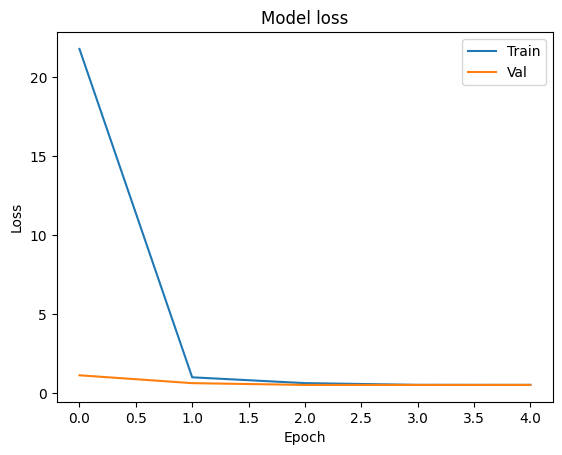

In [60]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

**Training Accuracy and Validation Accuracy Plot**

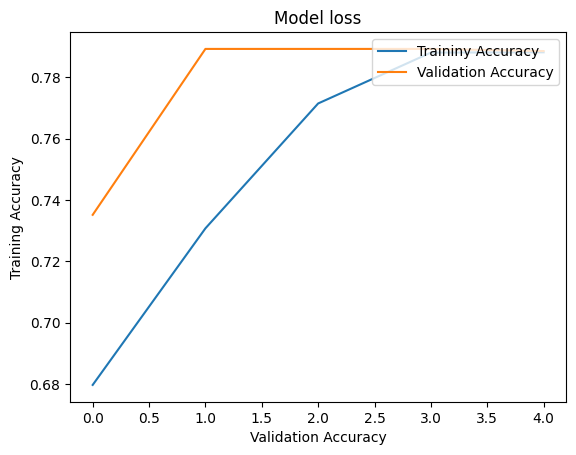

In [61]:
#Plot the graph:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model loss')
plt.ylabel('Training Accuracy')
plt.xlabel('Validation Accuracy')
plt.legend(['Traininy Accuracy', 'Validation Accuracy'], loc='upper right')
plt.show()

# Apply the XGBoost Classifier for Boosting the data

In [70]:
#Apply the XGBoost Classifier:
from xgboost import XGBClassifier
#Apply the xgboost classifier:
xgboost = XGBClassifier()
xgboost.fit(X_train, y_train)
y_pred = xgboost.predict(X_test)
#Apply the evlaution mdoels:
print("Classification Report of Model: \n", classification_report(y_test, y_pred))
print("Accuracy Score of Model:" ,accuracy_score(y_test, y_pred))
print("Confusion Matrix of Model:\n" ,confusion_matrix(y_test, y_pred))

Classification Report of Model: 
               precision    recall  f1-score   support

           0       0.89      0.95      0.92     26052
           1       0.74      0.57      0.64      6955

    accuracy                           0.87     33007
   macro avg       0.81      0.76      0.78     33007
weighted avg       0.86      0.87      0.86     33007

Accuracy Score of Model: 0.8663313842518253
Confusion Matrix of Model:
 [[24661  1391]
 [ 3021  3934]]


**Plot the Confusion Matrix**

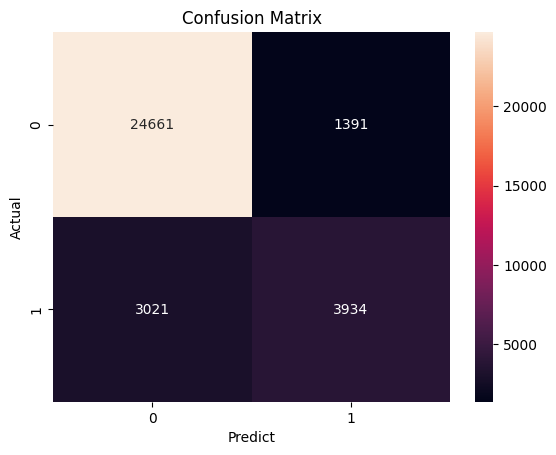

In [80]:
#Plot the confusion matrix of dataset:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predict')
plt.ylabel('Actual')
plt.show()


**Apply the label Encoder to encode the test dataset**

In [83]:
#Apply the Label encoder on the 
le = LabelEncoder()
df_test['Gender'] = le.fit_transform(df_test['Gender'])
df_test['Geography'] = le.fit_transform(df_test['Geography'])

### Save the Submission file with XGBoost Classifier: 

In [85]:
#Save the Submission file:
y_pred = xgboost.predict_proba(df_test.drop(['id', 'CustomerId', 'Surname'], axis=1))
df_submission['Exited'] = y_pred[:, 1]
df_submission.to_csv('df_submission.csv', index=False)